In [272]:
from ChemSPX import ChemSPX
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Basic Use of ChemSPX

In [273]:
input = {
    'in_file': '../examples/2d/2d_samples.csv', # Data input file
    'out_dir': 'output',                        # Output directory
    'print_every': 1,                           # Print every N itteration
    'write_initial': True,                      # Write out initial inverse distance function evaluation results
    'init_data_sampling': 'random',             # Initial data sampling method
    'omptimisation_cycles': 100,                # Number of GA optimisation cycles              

    'Apply_BD': True,                           # Apply boundary conditions 
    'UBL': '1, 1',                              # Upper boundary limit
    'LBL': '0, 0',                              # Lower boundary limit

    'iteration_num': 50,                        # Number of ChemSPX itterations 
    'sample_number': 5,                         # Number of sample points

    'conv_fx': 1,                               # fx (inverse distance function) convergence threshold 
    'conv_del_fx': 1e-7,                        # delta fx convergence threshold
    'conv_vec': 1e-1,                           # vector change convergence threshold
    'check_conv_every': 100,                    # Check convergence every N ChemSPX itteration

    'method': 'full_space',                     # New data point optimisation strategy  
    'xi': 0.1,                                  # Optimisation step size

    'pop_size': 100,                            # GA optimiser population size
    'f(x)': 'Force',                            # Evaluation function - inverse distance function 
    'power': 2,                                 # Reciprocal power for inverse distance function
    'k': 3,                                     # Number of nearest neighbours
}

In [282]:
for key, val in input.items():
    print("{:<20} {:<20}".format(key, val))

in_file              ../examples/2d/2d_samples.csv
out_dir              output              
print_every          1                   
write_initial        1                   
init_data_sampling   random              
omptimisation_cycles 100                 
Apply_BD             1                   
UBL                  1, 1                
LBL                  0, 0                
iteration_num        50                  
sample_number        5                   
conv_fx              1                   
conv_del_fx          1e-07               
conv_vec             0.1                 
check_conv_every     100                 
method               full_space          
xi                   0.1                 
pop_size             100                 
f(x)                 Force               
power                2                   
k                    3                   


In [184]:
ChemSPX(input).run()


  _____  _     _  ______ _______      _______  _____  _     _
 |       |_____| |______ |  |  |      |______ |_____]  \___/ 
 |_____  |     | |______ |  |  |      ______| |       _/   \_
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_                                                            
                                                             
                  Chemical Space Explorer
                      I. Pakamore PhD    
                   University of Glasgow

INITIAL DATA
------------------------------
mean f(x)       = 21.44373
STD  f(x)       = 31.34735
sample size = 5

                    OPTIMISATION -- GA METHOD

Step       <f(x)>        Δ<f(x)>         <ΔVEC>          Loop time(s)
----------------------------------------------------------------------
1       2.144373e+01   1.134847e+03    7.680549e-02       2.426893
2       5.068671e+00   4.508970e+00    5.877889e-02       2.478318
3       3.566634e+00   5.091616e-01    3.585273e-02       1.9823

In [189]:
resul_file = pd.read_csv("output/fx_data.csv")

Text(0, 0.5, 'Average Inverse Distance Function')

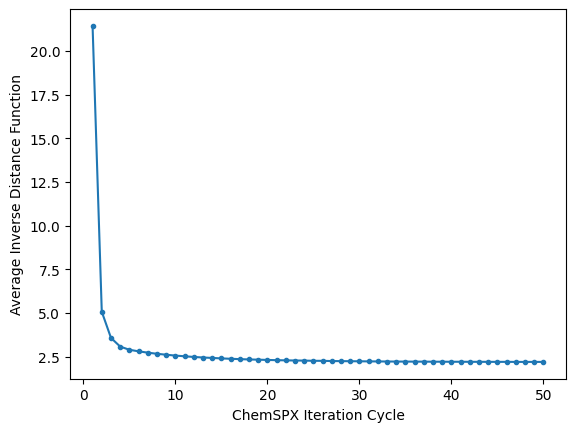

In [190]:
plt.plot(resul_file["iteration"], resul_file["average of f(x)"], '.-')
plt.xlabel("ChemSPX Iteration Cycle")
plt.ylabel("Average Inverse Distance Function")

Text(0, 0.5, 'Average Vector Change')

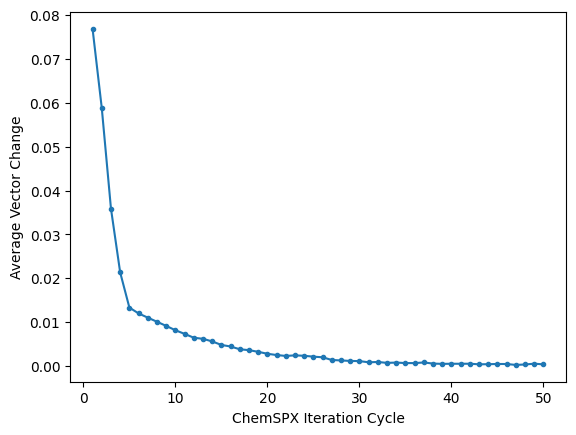

In [191]:
plt.plot(resul_file["iteration"], resul_file["average vec. change"], '.-')
plt.xlabel("ChemSPX Iteration Cycle")
plt.ylabel("Average Vector Change")

In [194]:
new_sample_points_1 = np.loadtxt("output/initial_points.csv", delimiter=",")
new_sample_points_2 = np.loadtxt("output/iteration_50.csv", delimiter=",")
original_data = np.loadtxt("../examples/2d/2d_samples.csv", delimiter=",")

Text(0, 0.5, 'Y axis')

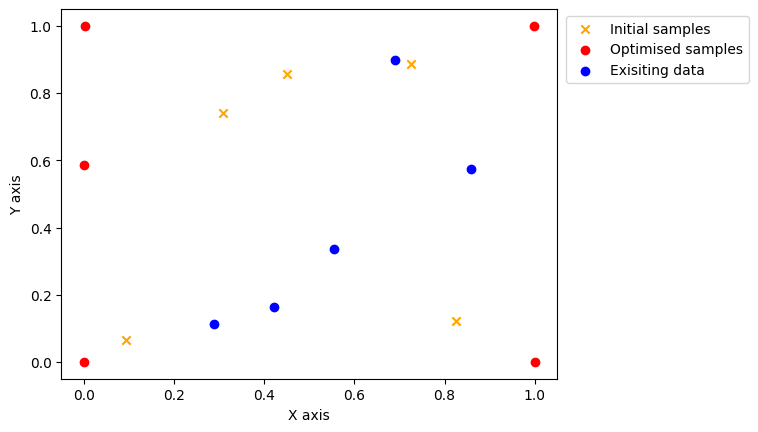

In [195]:
plt.scatter(new_sample_points_1[:, 0], new_sample_points_1[:, 1], c='orange', marker='x', label='Initial samples')
plt.scatter(new_sample_points_2[:, 0], new_sample_points_2[:, 1], c='red', label='Optimised samples')
plt.scatter(original_data[:, 0], original_data[:, 1], c='blue', label='Exisiting data')
plt.legend(bbox_to_anchor=(1.4, 1), loc="upper right")
plt.xlabel("X axis")
plt.ylabel("Y axis")

# Restricted Space Search

In [265]:
input = {
    'in_file': '../examples/2d/2d_samples.csv', # Data input file
    'out_dir': 'output',                        # Output directory
    'print_every': 1,                           # Print every N itteration
    'write_initial': True,                      # Write out initial inverse distance function evaluation results
    'init_data_sampling': 'random',             # Initial data sampling method
    'omptimisation_cycles': 100,                # Number of GA optimisation cycles              

    'Apply_BD': True,                           # Apply boundary conditions 
    'UBL': '0.6, 0.6',                              # Upper boundary limit
    'LBL': '0.2, 0',                              # Lower boundary limit

    'iteration_num': 50,                        # Number of ChemSPX itterations 
    'sample_number': 10,                         # Number of sample points

    'conv_fx': 1,                               # fx (inverse distance function) convergence threshold 
    'conv_del_fx': 1e-7,                        # delta fx convergence threshold
    'conv_vec': 1e-1,                           # vector change convergence threshold
    'check_conv_every': 100,                    # Check convergence every N ChemSPX itteration

    'method': 'full_space',                     # New data point optimisation strategy  
    'xi': 0.01,                                  # Optimisation step size

    'pop_size': 100,                            # GA optimiser population size
    'f(x)': 'Force',                            # Evaluation function - inverse distance function 
    'power': 2,                                 # Reciprocal power for inverse distance function
    'k': 'all',                                     # Number of nearest neighbours
}

In [266]:
ChemSPX(input).run()


  _____  _     _  ______ _______      _______  _____  _     _
 |       |_____| |______ |  |  |      |______ |_____]  \___/ 
 |_____  |     | |______ |  |  |      ______| |       _/   \_
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_                                                            
                                                             
                  Chemical Space Explorer
                      I. Pakamore PhD    
                   University of Glasgow

INITIAL DATA
------------------------------
mean f(x)       = 133.07616
STD  f(x)       = 208.98704
sample size = 10

                    OPTIMISATION -- GA METHOD

Step       <f(x)>        Δ<f(x)>         <ΔVEC>          Loop time(s)
----------------------------------------------------------------------
1       1.330762e+02   3.063877e+04    5.200750e-03       3.237086
2       5.425395e+01   2.176067e+03    4.465046e-03       3.978963
3       3.377375e+01   1.283583e+02    4.474148e-03       2.9

In [267]:
resul_file = pd.read_csv("output/fx_data.csv")

Text(0, 0.5, 'Average Inverse Distance Function')

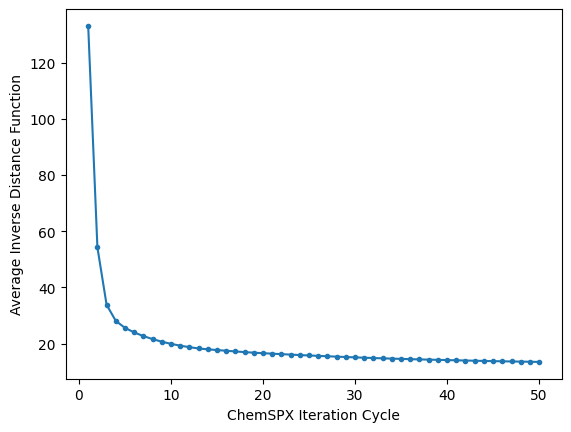

In [268]:
plt.plot(resul_file["iteration"], resul_file["average of f(x)"], '.-')
plt.xlabel("ChemSPX Iteration Cycle")
plt.ylabel("Average Inverse Distance Function")

Text(0, 0.5, 'Average Vector Change')

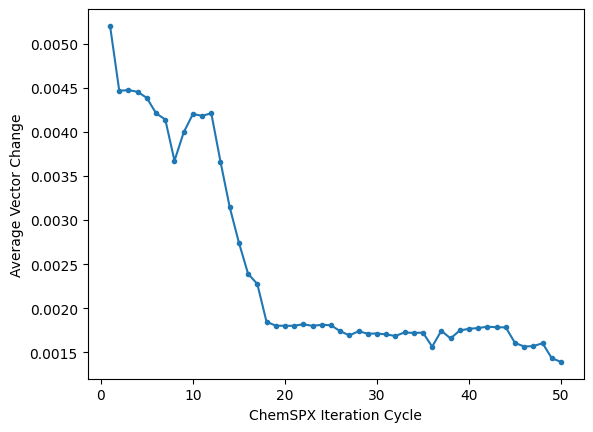

In [269]:
plt.plot(resul_file["iteration"], resul_file["average vec. change"], '.-')
plt.xlabel("ChemSPX Iteration Cycle")
plt.ylabel("Average Vector Change")


In [270]:
new_sample_points_1 = np.loadtxt("output/initial_points.csv", delimiter=",")
new_sample_points_2 = np.loadtxt("output/iteration_20.csv", delimiter=",")
original_data = np.loadtxt("../examples/2d/2d_samples.csv", delimiter=",")

Text(0, 0.5, 'Y axis')

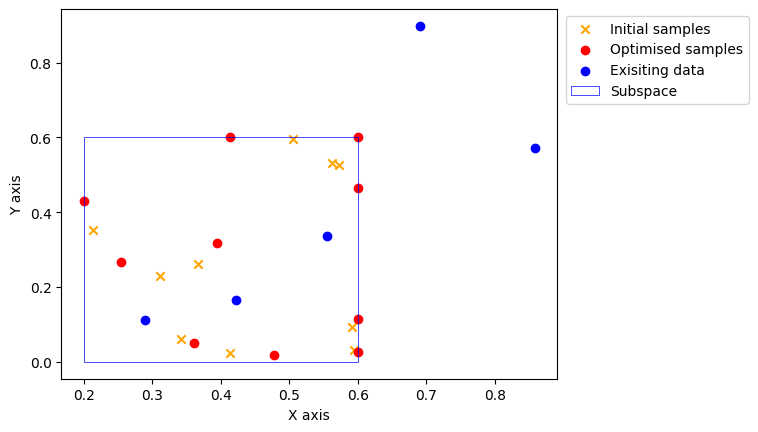

In [271]:
fig, ax = plt.subplots()
ax.scatter(new_sample_points_1[:, 0], new_sample_points_1[:, 1], c='orange', marker='x', label='Initial samples')
ax.scatter(new_sample_points_2[:, 0], new_sample_points_2[:, 1], c='red', label='Optimised samples')
ax.scatter(original_data[:, 0], original_data[:, 1], c='blue', label='Exisiting data')

width = 0.6 - 0.2
height = 0.6 - 0
rect = plt.Rectangle((0.2, 0), width, height, fill=False, edgecolor='blue', linewidth=0.5, label='Subspace')
ax.add_patch(rect)

plt.legend(bbox_to_anchor=(1.4, 1), loc="upper right")
plt.xlabel("X axis")
plt.ylabel("Y axis")

# Void Exploration Algorithm

In [ ]:
input = {
    'in_file': '../examples/2d/2d_samples.csv', # Data input file
    'out_dir': 'output',                        # Output directory
    'print_every': 1,                           # Print every N itteration
    'write_initial': True,                      # Write out initial inverse distance function evaluation results
    'init_data_sampling': 'void',               # Initial data sampling method
    'omptimisation_cycles': 100,                # Number of GA optimisation cycles              

    'Apply_BD': True,                           # Apply boundary conditions 
    'UBL': '1, 1',                              # Upper boundary limit
    'LBL': '0, 0',                              # Lower boundary limit

    'iteration_num': 0,                         # Number of ChemSPX itterations 
    'sample_number': 5,                         # Number of sample points

    'conv_fx': 1,                               # fx (inverse distance function) convergence threshold 
    'conv_del_fx': 1e-7,                        # delta fx convergence threshold
    'conv_vec': 1e-1,                           # vector change convergence threshold
    'check_conv_every': 100,                    # Check convergence every N ChemSPX itteration

    'method': 'full_space',                     # New data point optimisation strategy  
    'xi': 0.1,                                  # Optimisation step size

    'pop_size': 100,                            # GA optimiser population size
    'f(x)': 'BallTree_void',                    # Evaluation function - inverse distance function 
    'power': 2,                                 # Reciprocal power for inverse distance function
    'k': 3,                                     # Number of nearest neighbours
    'r':0.05                                    # Sphere radius used for BallTree Algortihm for VOID algorithm
}

In [213]:
ChemSPX(input).run()


  _____  _     _  ______ _______      _______  _____  _     _
 |       |_____| |______ |  |  |      |______ |_____]  \___/ 
 |_____  |     | |______ |  |  |      ______| |       _/   \_
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_                                                            
                                                             
                  Chemical Space Explorer
                      I. Pakamore PhD    
                   University of Glasgow


             VOID SEARCH -- GA

DP        N-neighbours        Loop time(s)
--------------------------------------------------
1             0                 1.017064
2             0                 0.922260
3             0                 0.881276
4             0                 0.805828
5             0                 0.718622
DONE: Void search completed.

INITIAL DATA
------------------------------
mean f(x)       = 1.00000
STD  f(x)       = 0.00000
sample size = 5

____ _ _  _ _ ____ _  _ __

In [216]:
new_sample_points_2 = np.loadtxt("output/void_search.csv", delimiter=",")
original_data = np.loadtxt("../examples/2d/2d_samples.csv", delimiter=",")

Text(0, 0.5, 'Y axis')

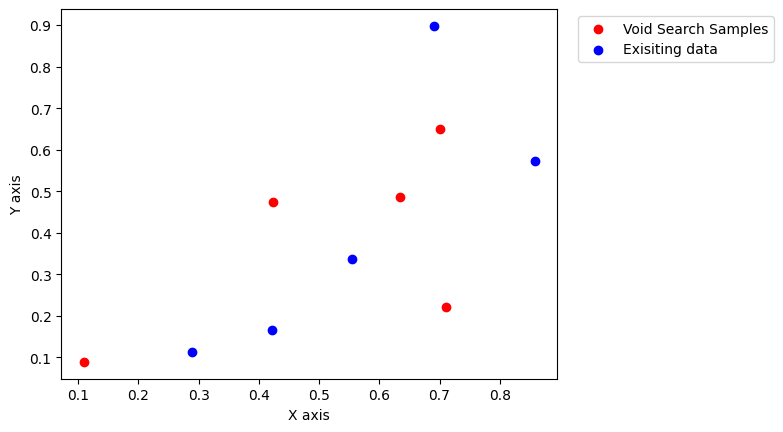

In [220]:
plt.scatter(new_sample_points_2[:, 0], new_sample_points_2[:, 1], c='red', label='Void Search Samples')
plt.scatter(original_data[:, 0], original_data[:, 1], c='blue', label='Exisiting data')
plt.legend(bbox_to_anchor=(1.45, 1), loc="upper right")
plt.xlabel("X axis")
plt.ylabel("Y axis")